### 선형 회귀
+ 데이터들 사이의 상관관계 또는 추이를 예측하거나, 대상 값 자체를 예측하는 지도학습 알고리즘
+ 예를 들어, 방의 개수와 집값의 상관 관계 또는 과거 10년간의 영업 실적을 분석하여 미래의 영업 실적을 예측하는 것
+ 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로 하여
+ 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법

### 선형성(Linearity)
+ 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것
+ 하나의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 단순 선형회귀라 하고
+ 둘 이상의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 다중 선형회귀라 함
+ 회귀분석의 중요 개념
    - $ {\hat y}=ax + b + \epsilon $


+ 선형방정식 : 두 변수의 관계를 방정식으로 표현
+ 기울기( $a$ ) : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
+ 절편( $b$ ) : 회귀선을 얼마나 위/아래로 평행이동시키는지 알수 있음

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

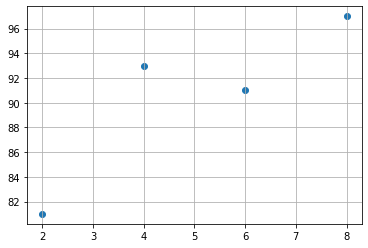

In [2]:
# 공부한 시간 대비 성적 예측을 단순선형회귀로 풀어봄
time = [2,4,6,8]
jumsu = [81,93,91,97]

plt.scatter(time,jumsu)
plt.grid()

### 최소제곱법OLS
* 선형방정식의 회귀계수를 구하는 일반적인 방법
* $ a = \frac {\sum (x - \bar x)(y - \bar y) } {\sum (x - \bar x) ^ 2}  $
* $ b = \bar y - (a \cdot \bar x) $

In [3]:
# 각 변수의 평균 구함
tmean = np.mean(time)
jmean = np.mean(jumsu)
print(tmean, jmean)

5.0 90.5


In [4]:
# 기울기를 구하는 식 중 분자에 해당하는 수식을 함수로 정의
def divtop(x, xmean, y, ymean):
    sums = 0
    for i in range(len(x)):
        sums += (x[i] - xmean) * (y[i] - ymean)
    return sums

# 기울기를 구하기 위한 공식에서 분자와 분모부분을 각각 구함

dividen = divtop(time, tmean, jumsu, jmean)
divsor = sum([(t - tmean)**2 for t in time])

a = dividen / divsor
b = jmean - (a*tmean)
print(a,b)

2.3 79.0


### 예측값을 넣어 회귀선을 그려봄
+ 구해진 선형방정식(y = 2.3x + 79)에 x값을 넣어 예측값 산출

In [5]:
z = [(a * t + b) for t in time] 
z

[83.6, 88.2, 92.8, 97.4]

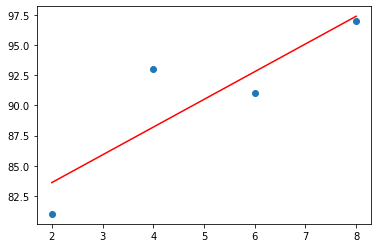

In [6]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r')

### 평균제곱근 오차RMSE
+ 최소제곱법을 이용해서 회귀직선을 그어 보았지만 다양한 상황에 적합한 직선을 긋기에는 부족
+ 즉, 여러 개의 독립변수로 구성된 데이터에 대한 회귀직선을 긋기에는 무리가 있음
+ 따라서, 여러 독립변수로 구성된 데이터의 경우 임의의 선을 그린 후 이 선의 오차를 평가하고 조금씩 수정해 나가는 방법이 필요
+ 주어진 선의 오차를 평가하는 방법 : 평균제곱근오차
+ (실제값 - 예측값)의 제곱합 나누기 데이터갯수의 제곱근
    - $ \sqrt {\frac {\sum (y - \hat y)^2} {n}} $


+ 최소제곱법에서는 공식을 이용해서 바로 기울기/절편 계산
+ 한편, 평균제곱근오차에서는 기울기와 절편에 아무값이나 대입하고 오차를 구해서 이 ***오차가 최소화하는 방식***을 사용

In [7]:
from sklearn.metrics import mean_squared_error

3.3166247903554

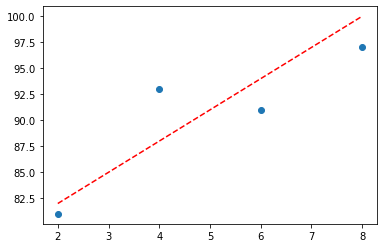

In [8]:
# 시도1 -> 기울기 : 3, 절편 : 76
a = 3; b = 76
z = [(a * t + b) for t in time] 
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

10.344080432788601

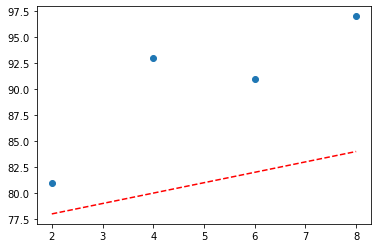

In [9]:
# 시도2 -> 기울기 : 1, 절편 : 76
a = 1; b = 76
z = [(a * t + b) for t in time] 
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

5.5677643628300215

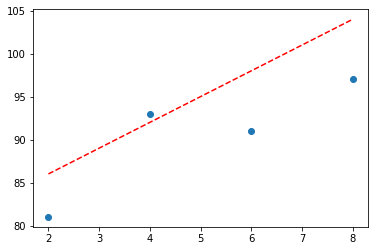

In [10]:
# 시도3 -> 기울기 : 3, 절편 : 80
a = 3; b = 80
z = [(a * t + b) for t in time] 
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

6.4031242374328485

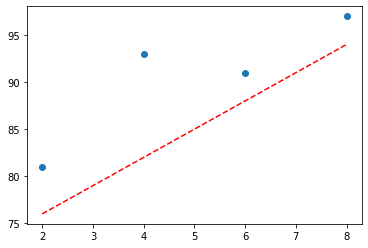

In [11]:
# 시도4 -> 기울기 : 3, 절편 : 70
a = 3; b = 70
z = [(a * t + b) for t in time] 
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

12.449899597988733

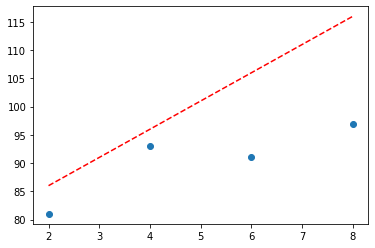

In [12]:
# 시도5 -> 기울기 : 5, 절편 : 76
a = 5; b = 76
z = [(a * t + b) for t in time] 
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

### 결론
+ 기울기가 커지면(3 -> 5) 오차가 증가 (3.31 -> 12.45)
+ 기울기가 작아지면(3 -> 1) 오차가 증가 (3.31 -> 10.34)
    + 즉, 기울기와 오차간의 상관관계가 존재

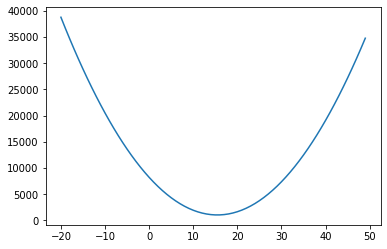

In [13]:
# 기울기의 변화에 따른 오차의 변화를 시각화
weights = []  # 기울기
loss = []     # 오차
b = 0         # 절편은 편의상 0

for w in range(-20,50): # 기울기를 -20~50 으로 설정
    z = [w * v + b for v in time] # 예측값
    weights.append(w)
    loss.append(mean_squared_error(jumsu,z)) # 오차 계산
plt.plot(weights, loss)

### 기울기와 오차의 관계
+ 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태임
+ 오차가 가장 작은 부분은?
    + 그래프 하단의 볼록한 부분


+ 기울기를 구하는 방법
    + 임의의 점을 선택 -> 미분 실시 -> 기울기가 0인지 확인
    + 기울기가 0일때까지 계속 반복 시행
    + 미분의 기울기를 이용한 ***경사하강법***을 적용

In [14]:
# 선형 회귀를 이용한 보스턴 집값 예측
# 1978 보스턴 주택 가격
# 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

/home/hadoop/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


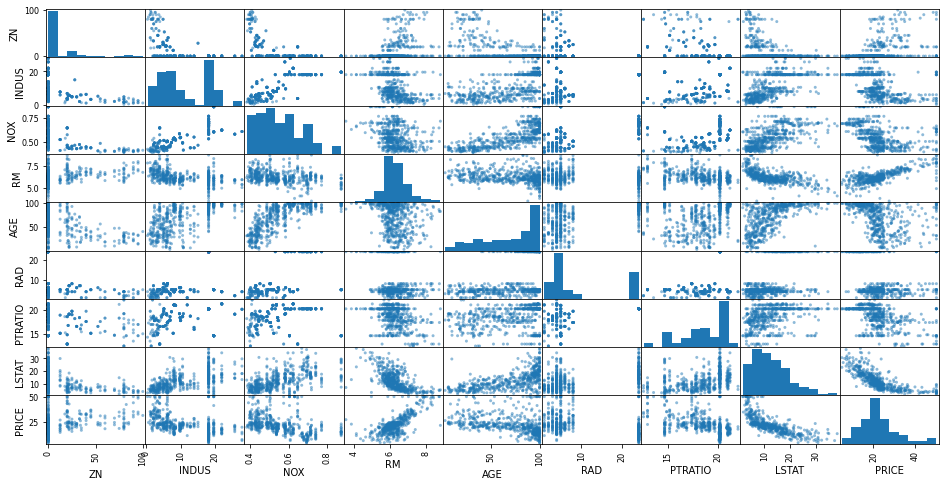

In [15]:
# 산점도 행렬
from pandas.plotting import scatter_matrix
# ZN INDUS NOX RM AGE RAD PTRATIO LSTAT PRICE
sm = df.iloc[:,[1,2,4,5,6,8,10,12,13]]
scatter_matrix(sm, figsize=(16,8))
plt.show()

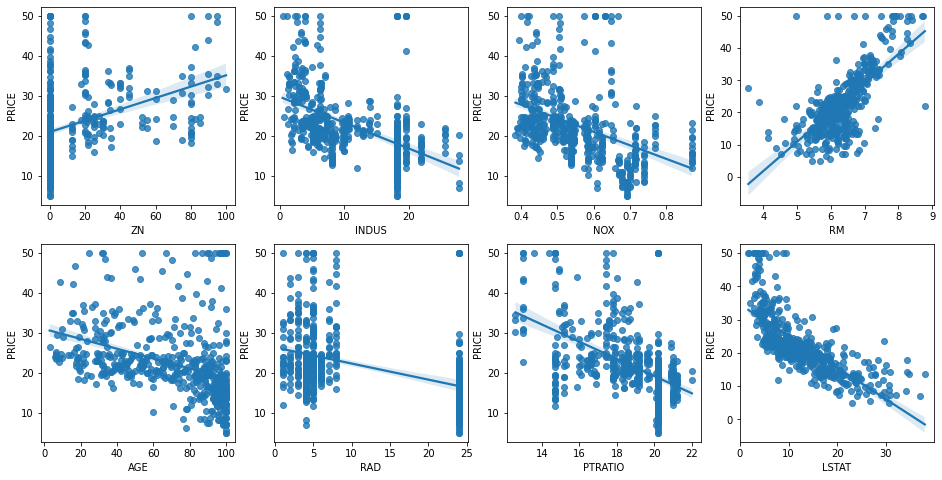

In [16]:
# 각 독립변수에 종속변수를 이용해서 회귀선을 그려보기
import seaborn as sns

features = ['ZN','INDUS','NOX','RM','AGE','RAD','PTRATIO','LSTAT']
fig, ax = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

for i, feature in enumerate(features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=ax[row][col])
plt.show()

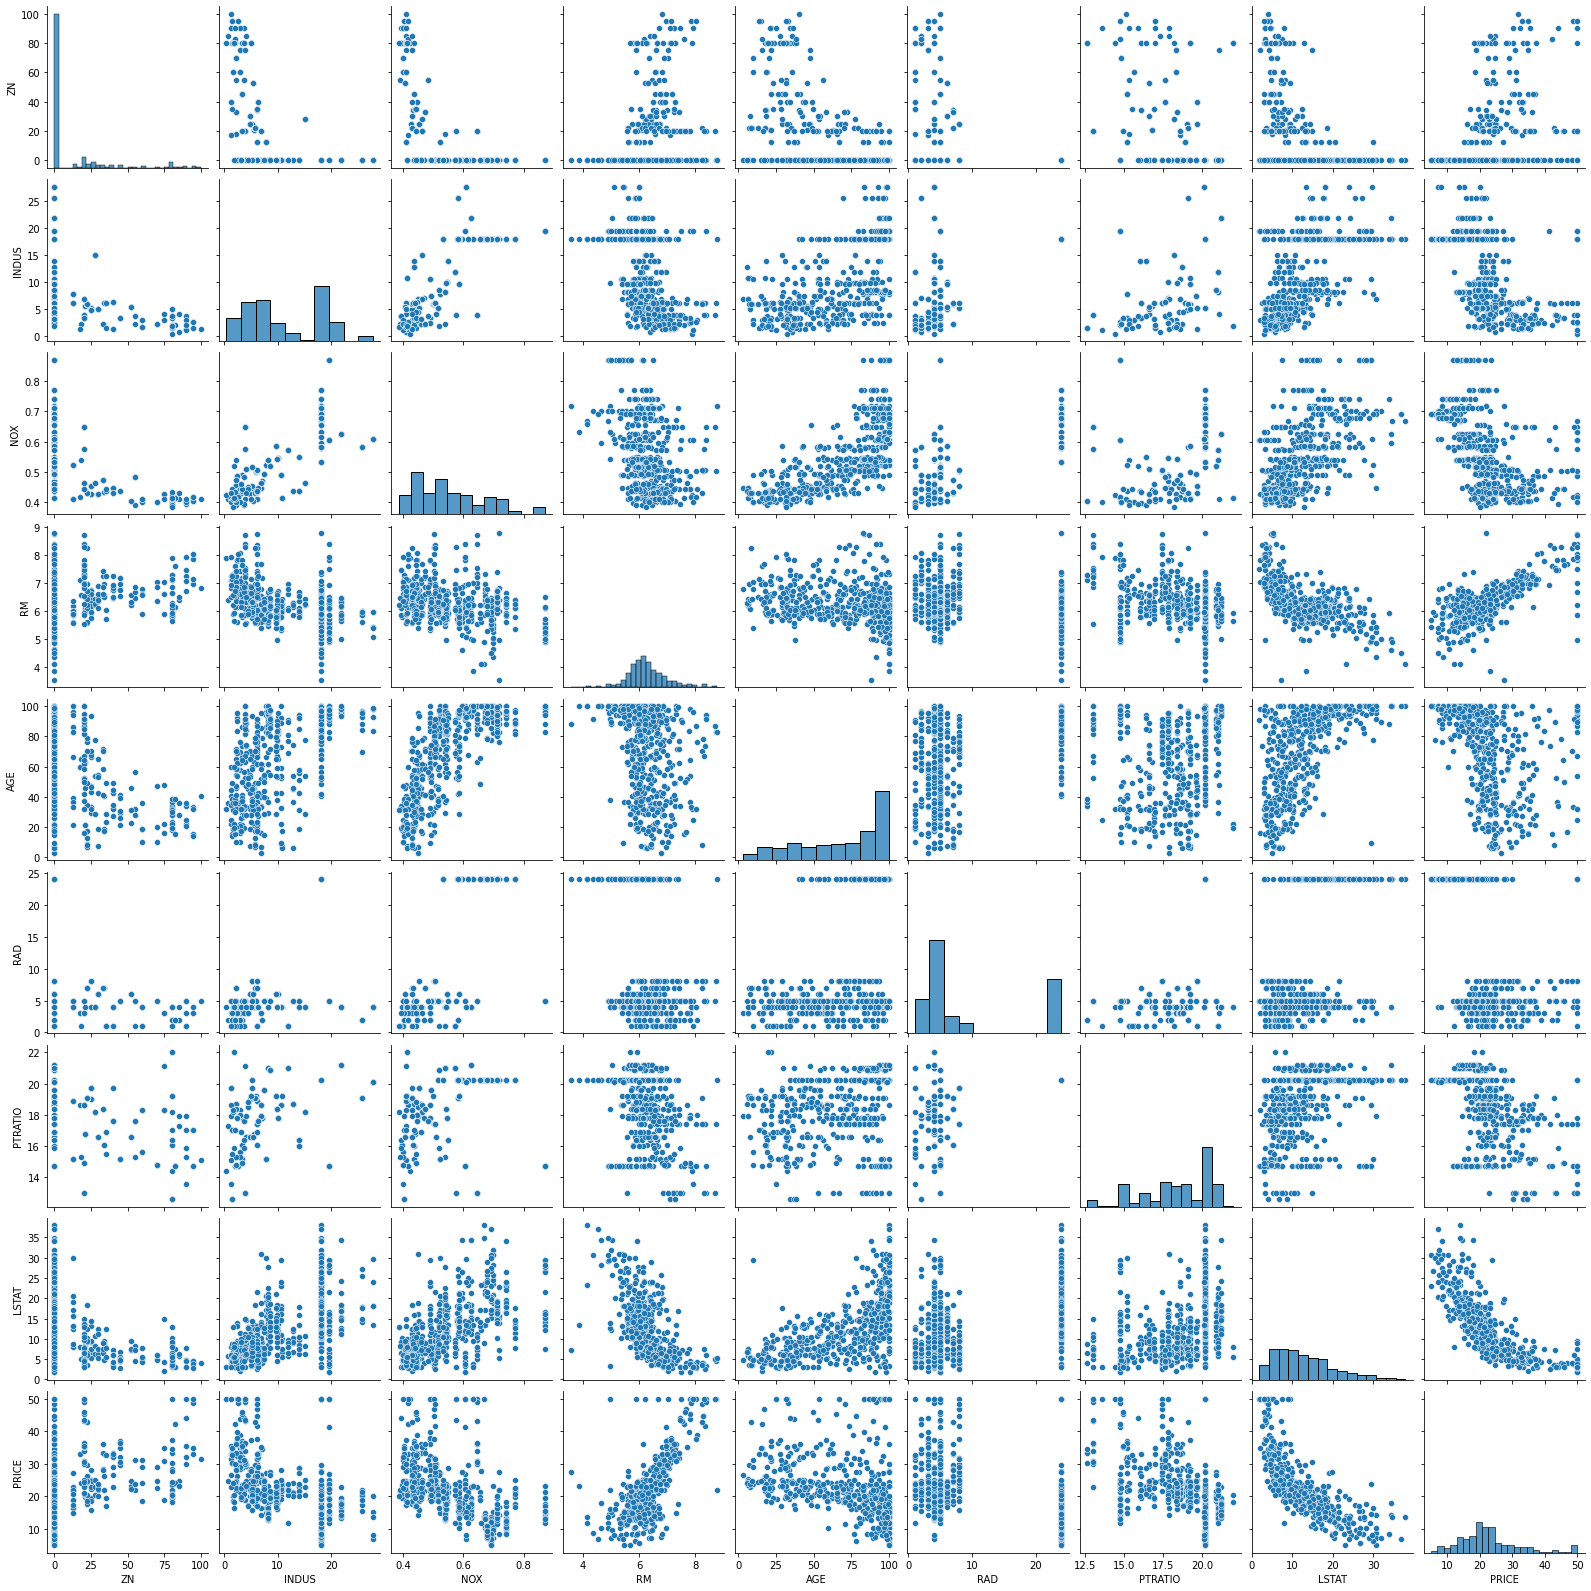

In [17]:
# seaborn 산점도 행렬
features.append('PRICE')
sns.pairplot(df[features])
plt.show()

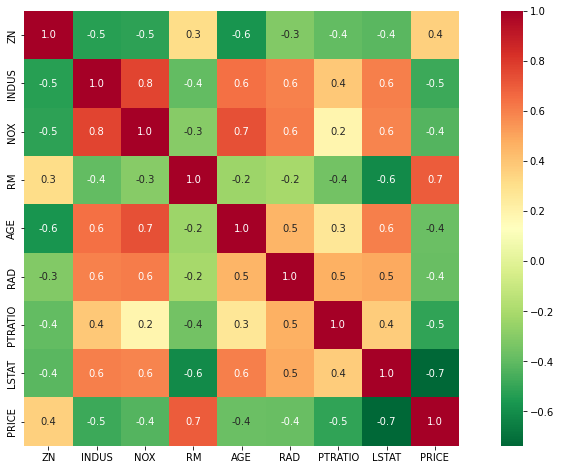

In [18]:
# 상관계수 행렬
cm = np.corrcoef(df[features].values.T)
plt.figure(figsize=(15,8))
# cmap : 히트맴 색상 변경하기 위한 컬러맴 지정
# annot : 히트맵에 상관계수 출력 여부 지정
# fmt : 상관계수 출력시 자릿수 지정
# titklabels : 히트맵 축 레이블 출력시 컬럼명 지정
# cbar, square : 컬러맵 막대 표시여부와 히트맵 출력 모양 지정
hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar=True, annot=True, square=True, fmt='.1f',xticklabels=features, yticklabels=features)

In [19]:
# 회귀분석 실시
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, train_size=0.7, random_state=2111081145)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

np.set_printoptions(precision=2)
print('기울기',lrclf.coef_)
print('절편',np.round(lrclf.intercept_,2))

# 선형회귀 모델 평가 : R^2, RMSE
mse = mean_squared_error(ytest, pred)
np.sqrt(mse)

기울기 [-1.12e-01  4.77e-02  5.77e-02  1.04e+00 -1.67e+01  4.45e+00 -6.38e-03
 -1.34e+00  3.03e-01 -1.33e-02 -8.50e-01  8.76e-03 -4.47e-01]
절편 29.15


5.330801796388731

In [20]:
r2_score(ytest,pred)

0.7213397671299536

In [21]:
# 공부한 시간 대비 성적 예측을 LinearRegression로 풀어봄
Xtrain, Xtest, ytrain, ytest = train_test_split(pd.DataFrame(time), jumsu, train_size=0.9, random_state=2111081145)
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print('기울기',lrclf.coef_)
print('절편',np.round(lrclf.intercept_,2))

기울기 [1.]
절편 87.67


In [22]:
# train/test 없이 바로 태스트
# reshape(-1,1) : 행 우선(가로) 데이터를 열 우선(세로) 데이터로 변경
""" [1,2,3] -> reshape - > [[1],
                            [2],
                            [3]] """

lrclf = LinearRegression()
lrclf.fit(np.array(time).reshape(-1,1), jumsu)

print('기울기',lrclf.coef_)
print('절편',np.round(lrclf.intercept_,2))

기울기 [2.3]
절편 79.0


In [23]:
# 공부한 시간 대비 성적 예측을 statsmodels의 OLS로 풀어봄
# pip install statsmodels
import statsmodels.api as sm

df = pd.DataFrame({'time':time, 'jumsu':jumsu})
df.head()

,time,jumsu
0,2,81
1,4,93
2,6,91
3,8,97


In [24]:
# OLS(종속변수, 독립변수, 옵션)
df['intercept'] =1 # 절편 추가
lm = sm.OLS(df.jumsu, df[['time','intercept']])
result = lm.fit()
result.summary()

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  jumsu   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     6.373
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.128
Time:                        17:07:35   Log-Likelihood:                -9.9083
No. Observations:                   4   AIC:                             23.82
Df Residuals:                       2   BIC:                             22.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           2.3000      0.911      2.525      0.128      -1.620       6.220
intercept     79.0000      4.990     15.832      0.004      57.530     100.470
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.020
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.679
Skew:                           0.911   Prob(JB):                        0.712
Kurtosis:                       2.130   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

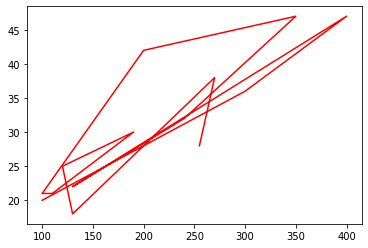

In [25]:
# 배달정보가 담긴 데이터가 다음과 같을때 회귀분석을 이용해서 회귀계수/R^2를 구하고 배달거리가 200m라면 배달시간은 얼마인지 예측하세요.
baedal = pd.read_csv('csv/delivery.txt', header=None)
baedal.columns = ['dist','time']
plt.plot(baedal.dist, baedal.time, 'r')
plt.show()

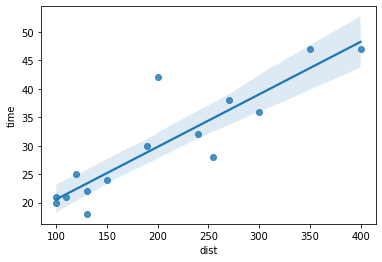

In [26]:
sns.regplot(data=baedal, x='dist', y='time')
plt.show()

In [27]:
baedal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dist    15 non-null     int64
 1   time    15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [28]:
round(baedal.describe(),2)

,dist,time
count,15.00,15.00
mean,203.00,30.07
std,95.91,9.86
min,100.00,18.00
25%,125.00,21.50
50%,190.00,28.00
75%,262.50,37.00
max,400.00,47.00


In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(baedal.dist).reshape(-1,1), baedal.time, train_size=0.9, random_state=2111081445)
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print(lrclf.coef_, '%.2f' % lrclf.intercept_)

[0.09] 11.99


In [30]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

3.10 0.94


In [31]:
lrclf.predict(np.array([[200]]))

array([29.5])

In [32]:
# 흡연여부와 임신주차에 따른 신생아 몸무게 측정
# 37/40주차, 흡연일때 몸무게와 42주차, 금연일때 몸무게는?
pg = pd.read_csv('csv/pregnant.txt', sep='\t')
pg.head()

,Wgt,Week,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


In [33]:
# 레이블 인코딩 1 - LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(pg.Smoke)
pg['smoke1'] = encoder.transform(pg.Smoke)
pg.iloc[:,[2,3]].head()

,Smoke,smoke1
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1


In [34]:
# 레이블 인코딩 2 - lamdba function
pg['smoke2'] = pg.Smoke.apply(lambda x: 0 if x == 'no' else 1)
pg.iloc[:,[2,4]].head()

,Smoke,smoke2
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1


In [35]:
# 레이블 인코딩 3 - pandas의 categorical 함수
# Categorical 를 이용해서 변주현변수로 변환
# pd.Categorical(pg.Smoke)
# pg.Smoke.astype('category').head()
pg['smoke3'] = pd.Categorical(pg.Smoke)
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Wgt     32 non-null     int64   
 1   Week    32 non-null     int64   
 2   Smoke   32 non-null     object  
 3   smoke1  32 non-null     int64   
 4   smoke2  32 non-null     int64   
 5   smoke3  32 non-null     category
dtypes: category(1), int64(4), object(1)
memory usage: 1.5+ KB


In [36]:
# Series 객체에서 지원하는 cat.codes 를 이용해서 category별 인코딩값 확인
pg['smoke3'] = pg.smoke3.cat.codes
pg.iloc[:,[2,5]].head()

,Smoke,smoke3
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1


<AxesSubplot:xlabel='smoke3', ylabel='Wgt'>

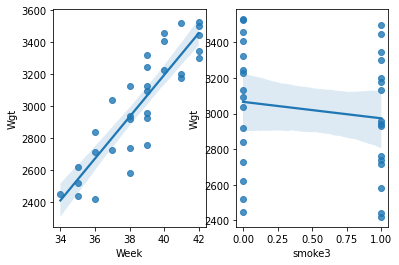

In [37]:
# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x='Week',y='Wgt', data=pg, ax=ax1)
sns.regplot(x='smoke3',y='Wgt', data=pg, ax=ax2)

+ 독립변수에 범주형 변수가 포함되어 있을때 회귀분석을 실시하려면 독립변수를 범주형 변수의 기준으로 나누는 것이 좋음

[143.21] -2631.30


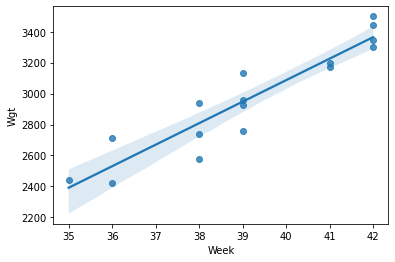

In [38]:
# 흡연하는 산모의 경우
sp = pg.loc[pg.smoke3 == 1, ['Week','Wgt']]
sns.regplot(x='Week',y='Wgt', data=sp)

Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(sp.Week).reshape(-1,1), sp.Wgt, train_size=0.7, random_state=2111081545)
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print(lrclf.coef_, '%.2f' % lrclf.intercept_)

In [39]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

49.42 0.98


[137.3] -2172.03


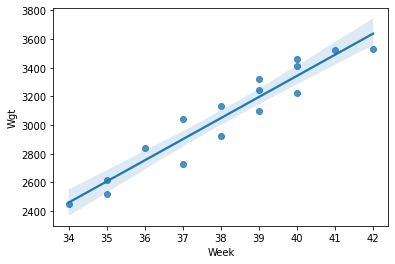

In [40]:
# 흡연하지 않는 산모의 경우
nsp = pg.loc[pg.smoke3 == 0, ['Week','Wgt']]
sns.regplot(x='Week',y='Wgt', data=nsp)

Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(nsp.Week).reshape(-1,1), nsp.Wgt, train_size=0.7, random_state=2111081545)
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print(lrclf.coef_, '%.2f' % lrclf.intercept_)

In [41]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

133.11 0.86
